In [ ]:
import simspace as ss
import pandas as pd

## Quick Demo: reference-based simulation for CODEX spatial proteomics data

In [2]:
# Step 1: Load the reference dataset. We here provide a sample dataset from Xenium human breast tumor dataset.
ref_meta = pd.read_csv('../data/CODEX_metadata.csv', index_col=0)
ref_omics = pd.read_csv('../data/CODEX_count.csv', index_col=0)

In [3]:
ref_meta.head(3)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,CellID,centroid_x,centroid_y,Area,perimeter,axis_ratio,tile_h,...,IFNG,Ki67,CD44,PD1,TIM3,necrosis_2clusters,necrosis_3clusters,peri_intra_tumoral,X_centroid,Y_centroid
Unnamed: 0.3,,,,,,,,,,,,,,,,,,,,,
876849,876849,876849,3790987,1,39.842857,2.228571,70.0,32.863961,2.111366,37888,...,N,N,N,N,N,0,0,peri,37927.842857,26882.228571
876850,876850,876850,3790988,2,81.000000,1.500000,28.0,18.000000,1.788854,37888,...,N,N,N,N,N,0,0,peri,37969.000000,26881.500000
876851,876851,876851,3790989,3,94.694118,3.058824,85.0,34.485281,1.467060,37888,...,N,N,N,N,N,0,0,peri,37982.694118,26883.058824


In [4]:
ref_omics.head(3)

,DAPI,MPO,Ecadherin,PDL1,CD163,PD1,CD47,GAL3,PARP1,LAG3,...,MLH1,Ki67,CD20,ARID1A,IFNG,CD31,PMS,CD44,PanCytokeratin,CD3e
CellID,,,,,,,,,,,,,,,,,,,,,
1,21.585714,0.028571,0.1,0.928571,0.014286,1.214286,1.128571,32.971428,5.657143,1.900000,...,24.314285,0.900000,5.000000,7.657143,0.900000,0.400000,1.814286,2.828571,1.685714,20.142857
2,20.071428,0.000000,0.0,0.178571,0.428571,0.392857,0.607143,14.000000,0.071429,1.428571,...,5.678571,0.857143,1.928571,0.678571,0.678571,0.142857,0.142857,2.821429,1.928571,1.500000
3,17.858824,0.000000,0.0,0.047059,0.000000,0.235294,0.058824,7.482353,0.564706,1.364706,...,6.764706,0.329412,1.835294,1.141176,0.458824,0.082353,0.200000,0.741176,1.635294,0.717647


In [ ]:
# Step 2: Fit SimSpace spatial parameters from the reference.
# This step uses the reference metadata and omics data to fit the spatial parameters for the simulation.
# One can do this by using the `ss.fit()` method and some preprocessing, which is shown in details in spaital_fitting.ipynb.
# Here we provide a pre-fitted parameters for the CODEX human endometrial cancer dataset.
# The full dataset will be available upon request.
params = ss.util.load_params('../data/CODEX_fitted_params.json')

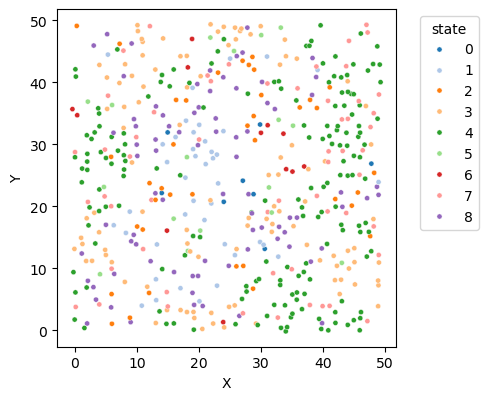

In [ ]:
# Step 3: Simulate the spatial omics data using the fitted parameters.
# This step uses the fitted parameters to simulate the spatial omics data, just as the reference-free simulation.
sim = ss.util.sim_from_params(
    parameters=params,
    shape=(50, 50),
    custom_neighbor=ss.spatial.generate_offsets(3, method='manhattan'),
    seed=0,
)
# This results is the simulated spatial omics data shown in Fig. 6, with x and y axis switched.
sim.plot(figsize=(5, 5), dpi=100, size=14)

In [ ]:
# Step 4 (Optional): Simulate omics data based on the spatial simulation.
# The omics profile can also be fitted from the reference dataset if the reference is available.
# Here we use the `fit_scdesign` method to fit the spatial simulation with the reference dataset, 
# which requires the R package 'scDesign3' to be installed. One can find more details in README about the installation.
sim.fit_scdesign(
    '../data/CODEX_count.csv',
    '../data/CODEX_metadata.csv',
    'phenotype',      # Column in metadata that contains the cell type information
    'X_centroid',   # Column in metadata that contains the x coordinate of the cell centroid
    'Y_centroid',   # Column in metadata that contains the y coordinate of the cell centroid
    seed=0,
)

Temporary directory created.
scDesgin fit complete.


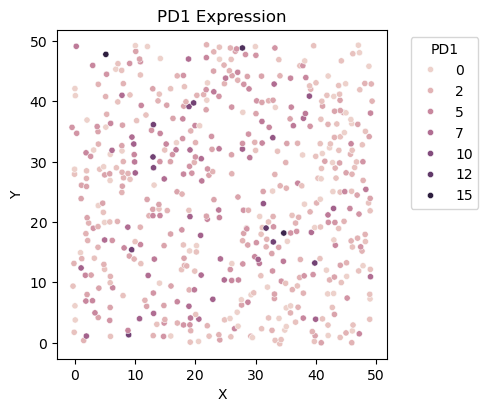

In [12]:
# Example of plotting a specific gene, e.g., 'PD1'.
sim.plot('PD1', figsize=(5,5), dpi=100, title='PD1 Expression')

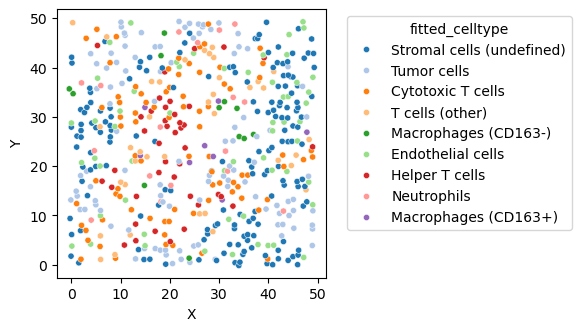

In [13]:
sim.plot('fitted_celltype', figsize=(6,6), dpi=100)